In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
filenames = glob.glob("../data/CICIDS2017/TrafficLabelling/*")
filenames

['../data/CICIDS2017/TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 '../data/CICIDS2017/TrafficLabelling/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 '../data/CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 '../data/CICIDS2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv',
 '../data/CICIDS2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv',
 '../data/CICIDS2017/TrafficLabelling/Wednesday-workingHours.pcap_ISCX.csv',
 '../data/CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 '../data/CICIDS2017/TrafficLabelling/Tuesday-WorkingHours.pcap_ISCX.csv']

In [4]:
for i,fn in enumerate(filenames):
    print("load file",fn)
    if i==0:
        df = pd.read_csv(fn,encoding='cp1252')
    else:
        df_temp = pd.read_csv(fn,encoding='cp1252')
        df = pd.concat([df,df_temp])
        del df_temp

load file ../data/CICIDS2017/TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


/home/srp/.pyenv/versions/osrnn/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (0,1,3,6,84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


load file ../data/CICIDS2017/TrafficLabelling/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
load file ../data/CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
load file ../data/CICIDS2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv
load file ../data/CICIDS2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv
load file ../data/CICIDS2017/TrafficLabelling/Wednesday-workingHours.pcap_ISCX.csv
load file ../data/CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
load file ../data/CICIDS2017/TrafficLabelling/Tuesday-WorkingHours.pcap_ISCX.csv


In [26]:
df_t = df

In [27]:
df = df_t[df_t[' Label']=='BENIGN']

In [28]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.50-389-33898-6,192.168.10.50,33898.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113095465.0,48.0,24.0,...,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,BENIGN
1,192.168.10.3-192.168.10.50-389-33904-6,192.168.10.50,33904.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113473706.0,68.0,40.0,...,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,BENIGN
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0.0,8.0.6.4,0.0,0.0,6/7/2017 8:59,119945515.0,150.0,0.0,...,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,BENIGN
3,192.168.10.14-65.55.44.109-59135-443-6,192.168.10.14,59135.0,65.55.44.109,443.0,6.0,6/7/2017 8:59,60261928.0,9.0,7.0,...,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.14-53-59555-17,192.168.10.14,59555.0,192.168.10.3,53.0,17.0,6/7/2017 8:59,269.0,2.0,2.0,...,32.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [29]:
print("the number of duplicates: ",len(df)-len(df.drop_duplicates()))
print("the ratio of duplicates: ",(len(df)-len(df.drop_duplicates()))/len(df))

the number of duplicates:  202
the ratio of duplicates:  8.886554335340727e-05


In [30]:
for cn in df.columns:
    print(cn)

Flow ID
 Source IP
 Source Port
 Destination IP
 Destination Port
 Protocol
 Timestamp
 Flow Duration
 Total Fwd Packets
 Total Backward Packets
Total Length of Fwd Packets
 Total Length of Bwd Packets
 Fwd Packet Length Max
 Fwd Packet Length Min
 Fwd Packet Length Mean
 Fwd Packet Length Std
Bwd Packet Length Max
 Bwd Packet Length Min
 Bwd Packet Length Mean
 Bwd Packet Length Std
Flow Bytes/s
 Flow Packets/s
 Flow IAT Mean
 Flow IAT Std
 Flow IAT Max
 Flow IAT Min
Fwd IAT Total
 Fwd IAT Mean
 Fwd IAT Std
 Fwd IAT Max
 Fwd IAT Min
Bwd IAT Total
 Bwd IAT Mean
 Bwd IAT Std
 Bwd IAT Max
 Bwd IAT Min
Fwd PSH Flags
 Bwd PSH Flags
 Fwd URG Flags
 Bwd URG Flags
 Fwd Header Length
 Bwd Header Length
Fwd Packets/s
 Bwd Packets/s
 Min Packet Length
 Max Packet Length
 Packet Length Mean
 Packet Length Std
 Packet Length Variance
FIN Flag Count
 SYN Flag Count
 RST Flag Count
 PSH Flag Count
 ACK Flag Count
 URG Flag Count
 CWE Flag Count
 ECE Flag Count
 Down/Up Ratio
 Average Packet Size
 Av

In [31]:
df[' Protocol'].unique()

array([ 6.,  0., 17.])

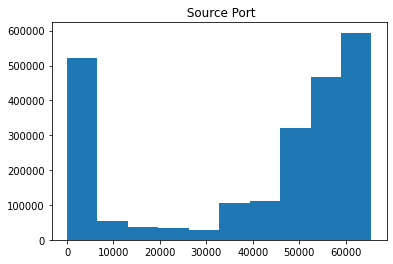

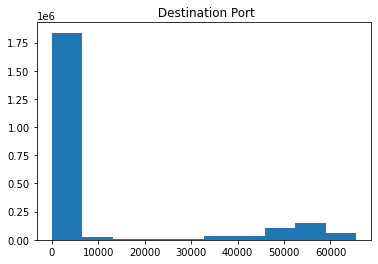

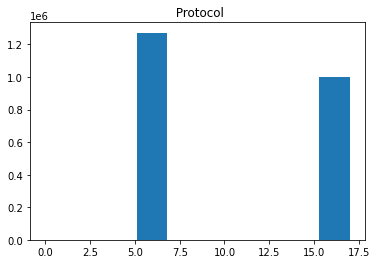

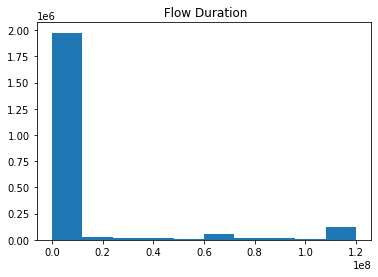

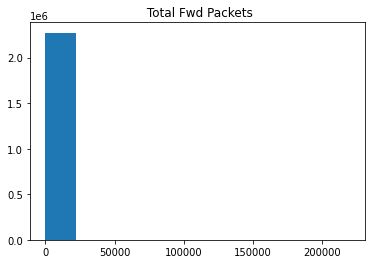

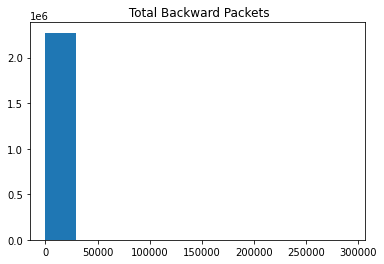

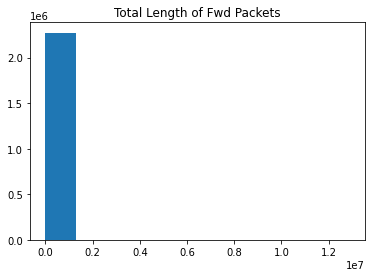

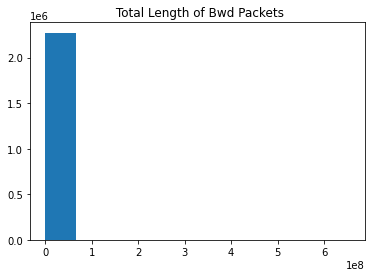

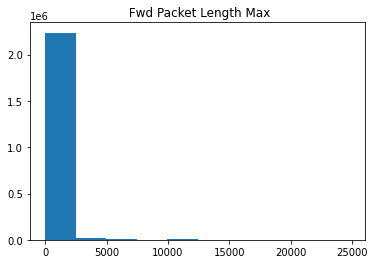

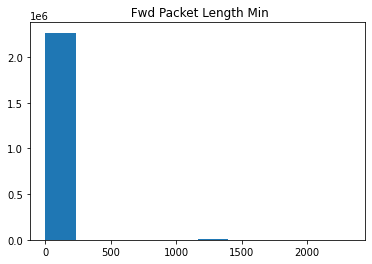

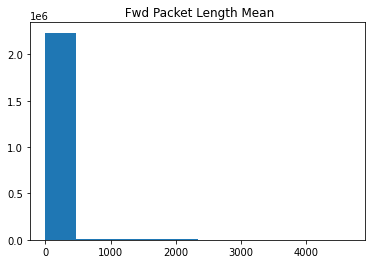

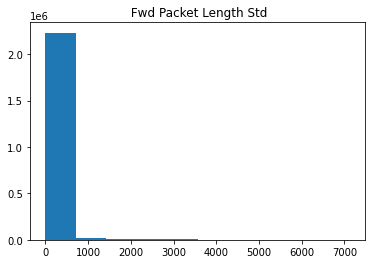

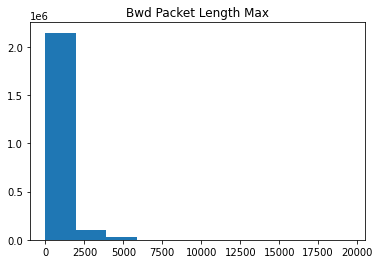

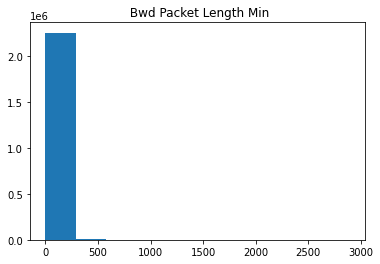

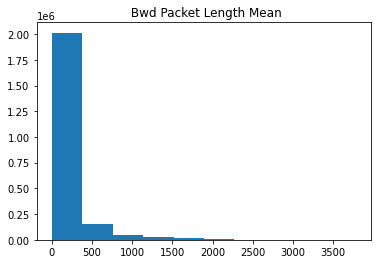

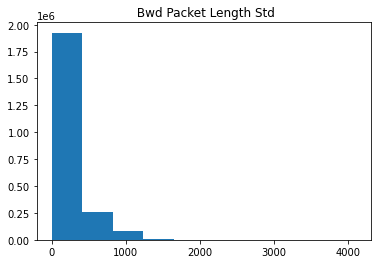

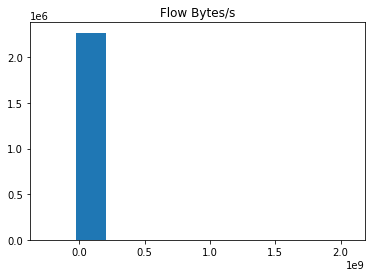

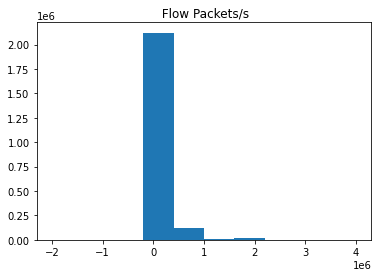

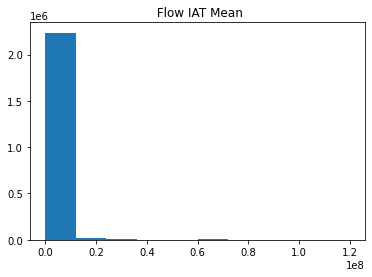

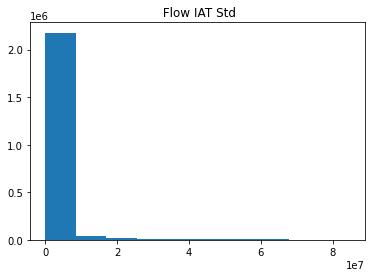

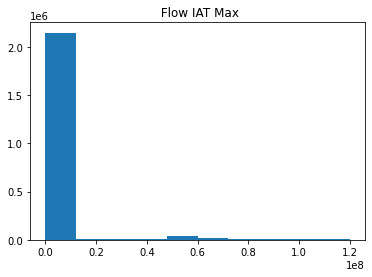

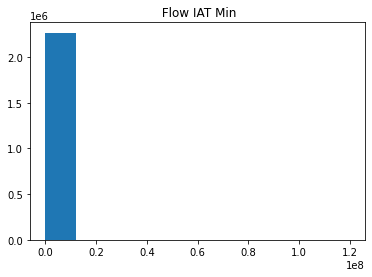

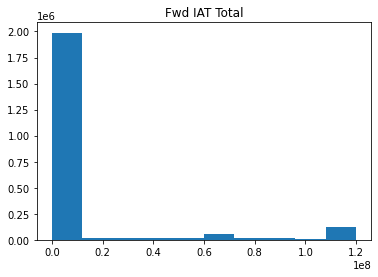

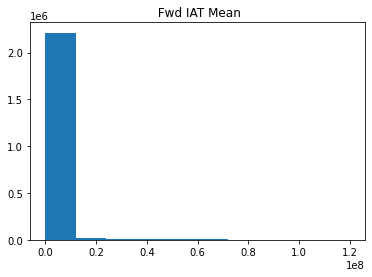

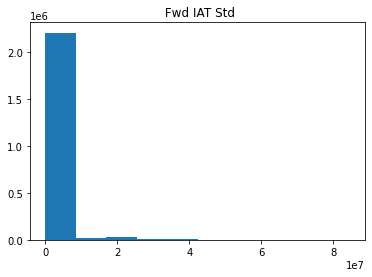

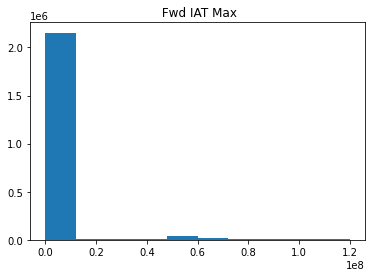

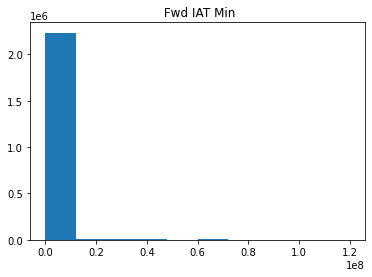

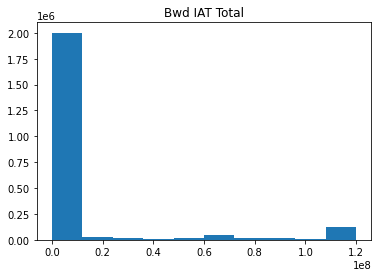

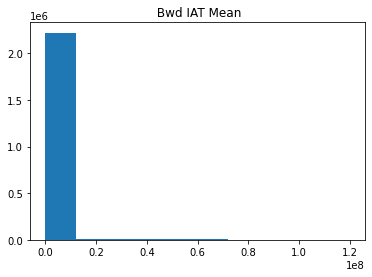

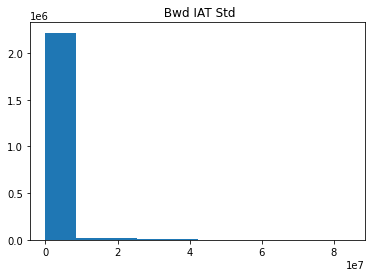

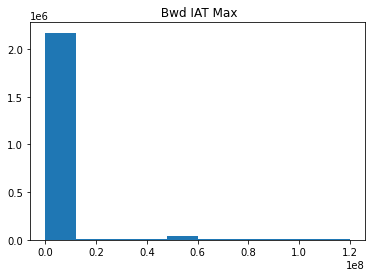

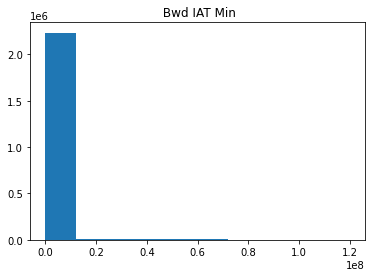

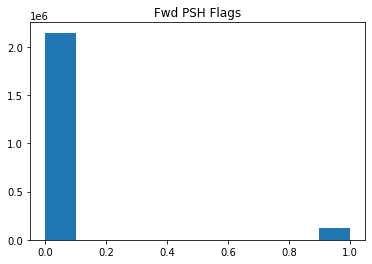

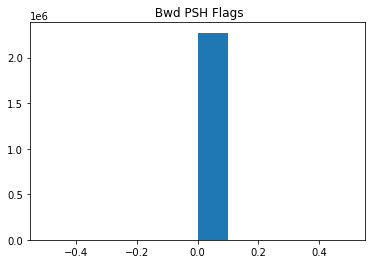

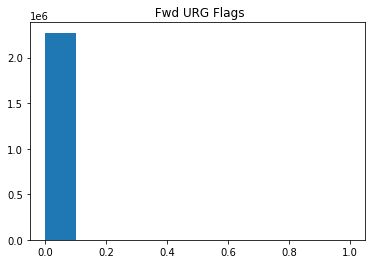

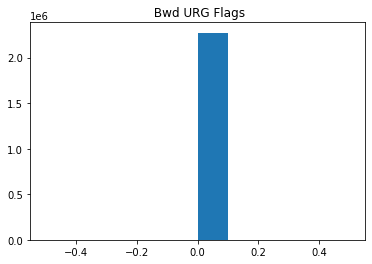

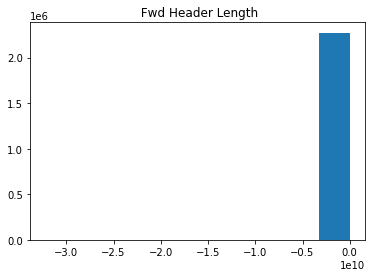

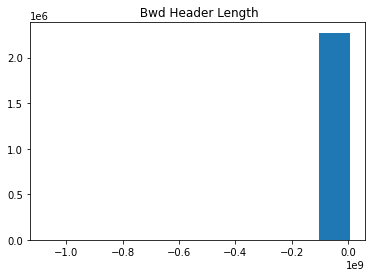

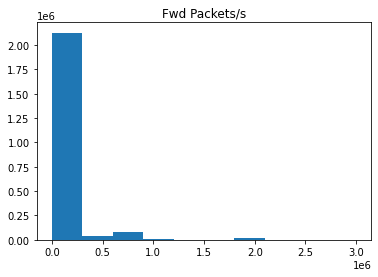

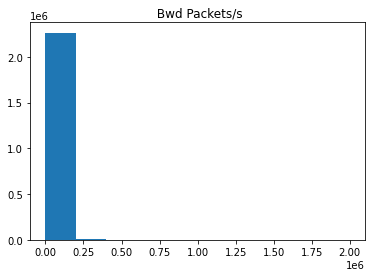

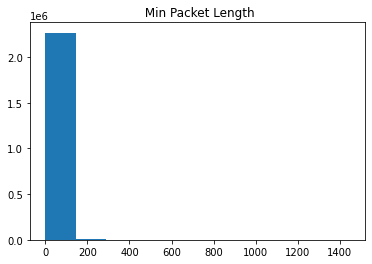

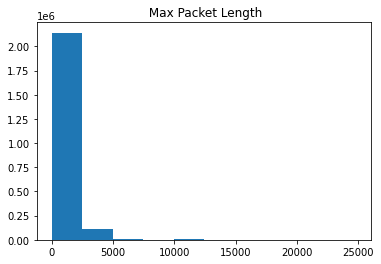

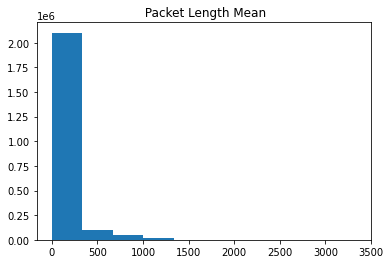

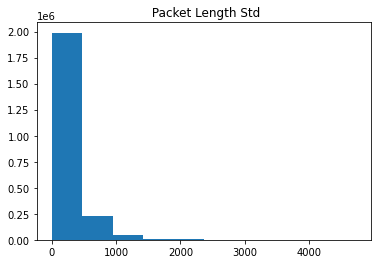

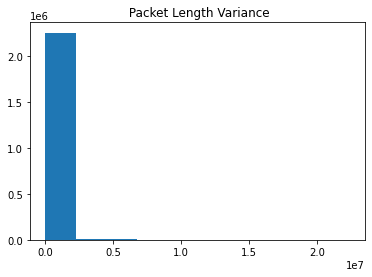

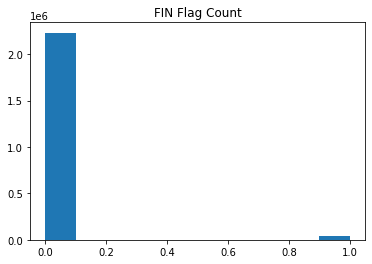

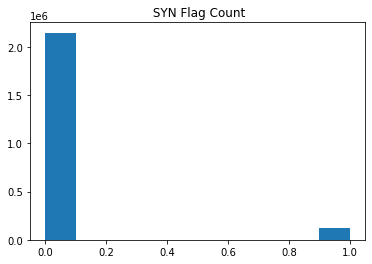

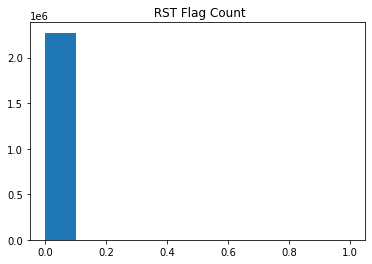

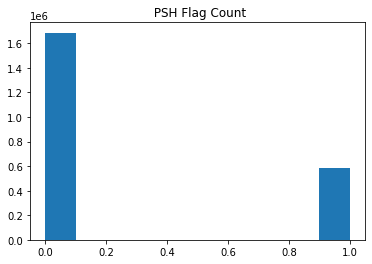

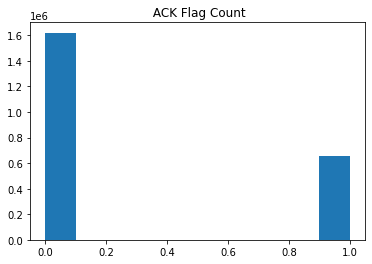

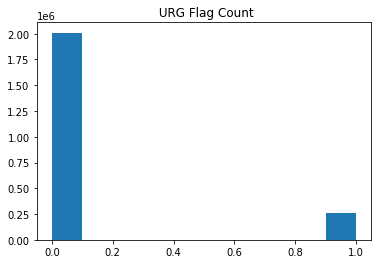

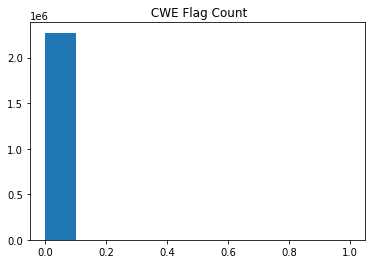

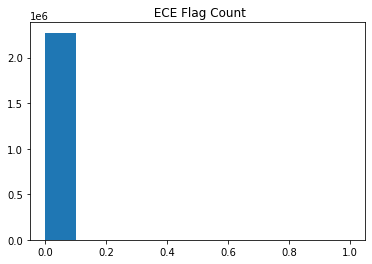

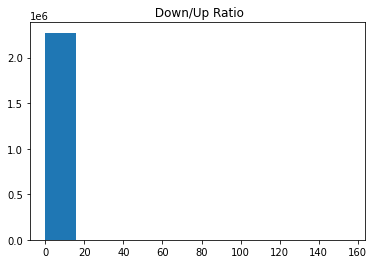

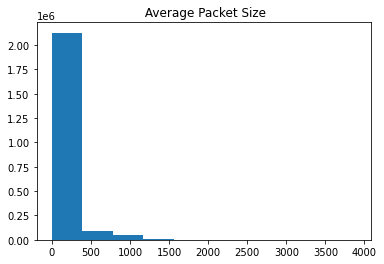

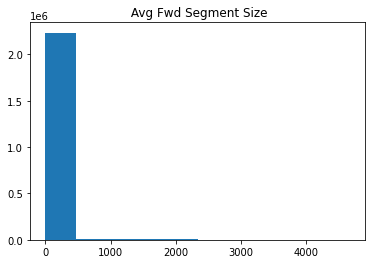

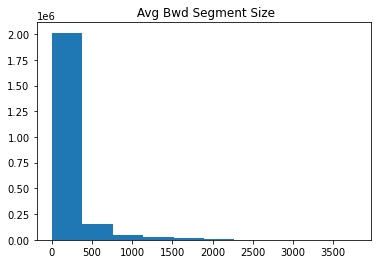

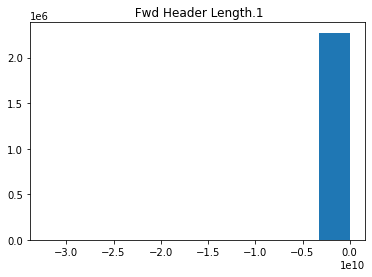

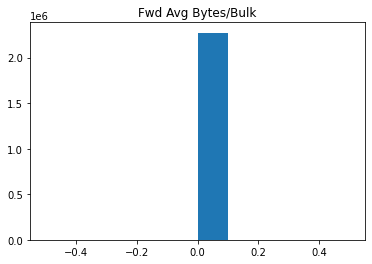

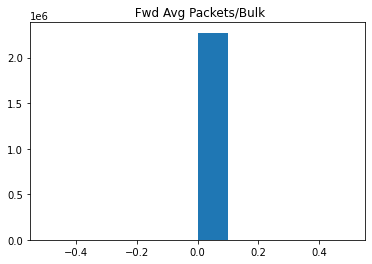

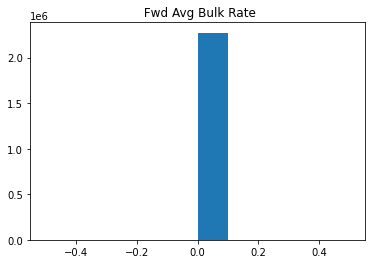

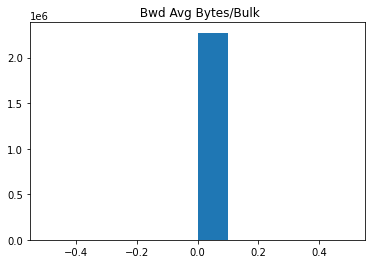

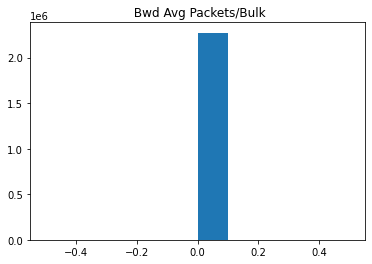

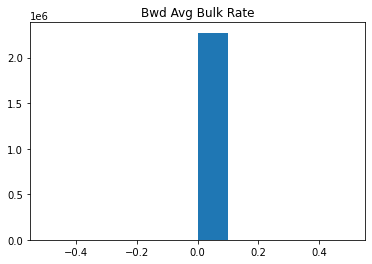

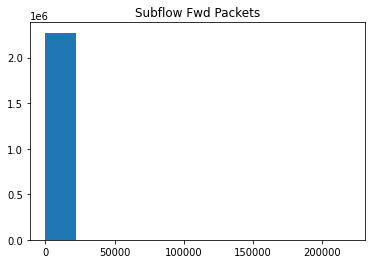

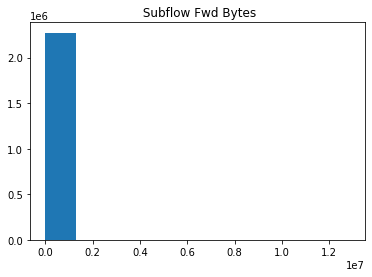

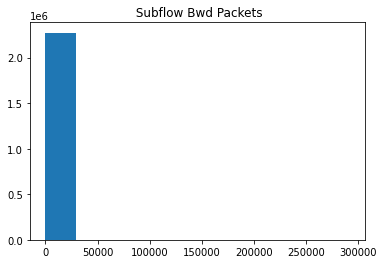

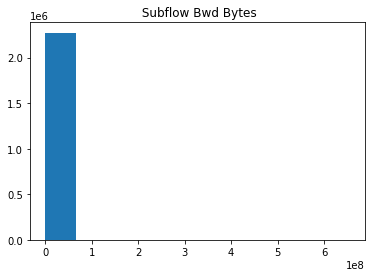

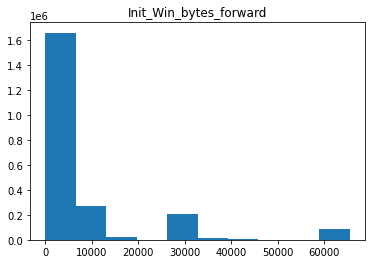

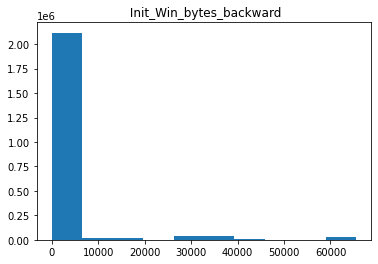

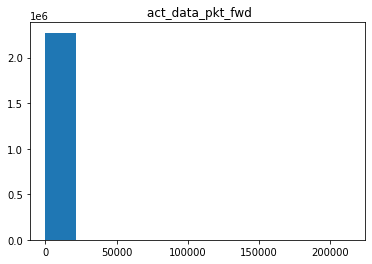

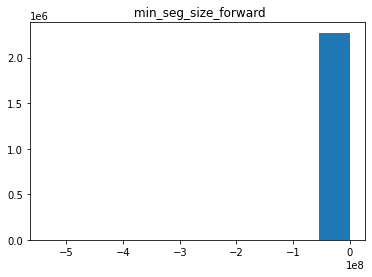

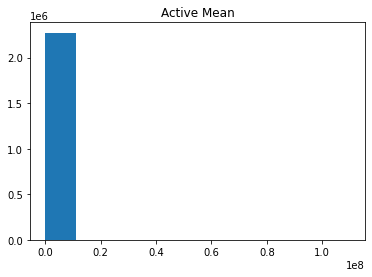

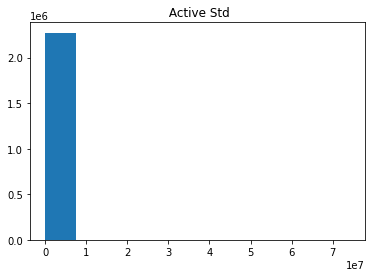

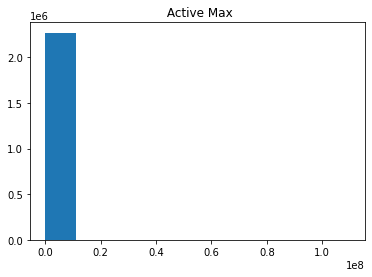

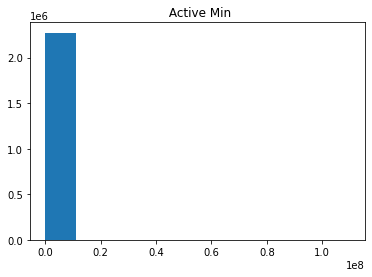

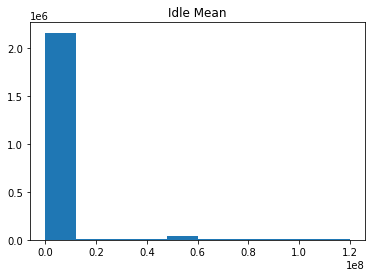

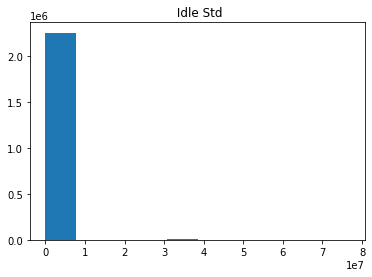

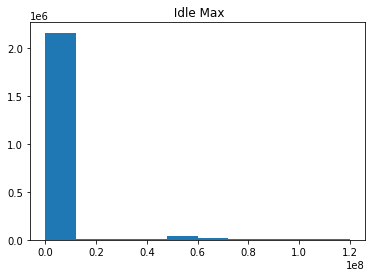

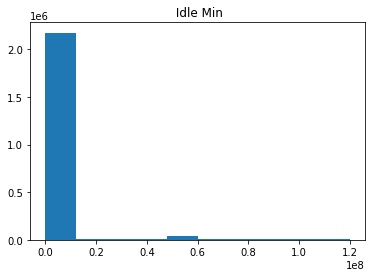

In [32]:
for colname in df.columns:
    col = df[colname]
#     print(colname, col.dtypes)
    if col.dtypes in ['int64','float64']:
#         print(len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
#               max(col[np.isfinite(col)]), min(col[np.isfinite(col)]),len(col.unique()))
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

In [33]:
# col = df[" Flow Duration"]
# print(len(col))
# print(sum(np.isfinite(col)))
# print( sum(pd.isna(col)))
# print(df[pd.isna(col)])

In [34]:
for colname in df.columns:
    col = df[colname]
#     print(colname, col.dtypes)
    if col.dtypes in ['int64','float64']:
        print(col.dtypes,len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
              max(col[np.isfinite(col)]), min(col[np.isfinite(col)]), np.mean(col[np.isfinite(col)]),len(col.unique()))

float64 0 0 0 65535.0 0.0 39720.58182866811 64490
float64 0 0 0 65535.0 0.0 9419.545171631478 53802
float64 0 0 0 17.0 0.0 10.832293562483255 3
float64 0 0 0 119999998.0 -13.0 11220820.773566196 775191
float64 0 0 0 219759.0 1.0 10.654173139113729 1413
float64 0 0 0 291922.0 0.0 12.13863640662937 1731
float64 0 0 0 12900000.0 0.0 635.536885579454 17863
float64 0 0 0 655453030.0 0.0 18848.707119405815 64643
float64 0 0 0 24820.0 0.0 230.3861621391432 5273
float64 0 0 0 2325.0 0.0 22.793373973921923 373
float64 0 0 0 4672.0 0.0 66.39606423588813 108742
float64 0 0 0 7125.596845843696 0.0 74.55630733051017 245869
float64 0 0 0 19530.0 0.0 396.5347871208312 4818
float64 0 0 0 2896.0 0.0 50.662469309492735 579
float64 0 0 0 3787.339614 0.0 160.79668121565484 154100
float64 0 0 0 4113.240146 0.0 123.12595162759462 248592
float64 1777 409 409 2071000000.0 -261000000.0 1779841.5562736206 1288467
float64 1777 0 0 4000000.0 -2000000.0 64778.59407067118 939058
float64 0 0 0 120000000.0 -13.0 9088

In [35]:
for colname in df.columns:
    col = df[colname]
    print(colname,",", col.dtypes)
#     if col.dtypes in ['int64','float64']:

Flow ID , object
 Source IP , object
 Source Port , float64
 Destination IP , object
 Destination Port , float64
 Protocol , float64
 Timestamp , object
 Flow Duration , float64
 Total Fwd Packets , float64
 Total Backward Packets , float64
Total Length of Fwd Packets , float64
 Total Length of Bwd Packets , float64
 Fwd Packet Length Max , float64
 Fwd Packet Length Min , float64
 Fwd Packet Length Mean , float64
 Fwd Packet Length Std , float64
Bwd Packet Length Max , float64
 Bwd Packet Length Min , float64
 Bwd Packet Length Mean , float64
 Bwd Packet Length Std , float64
Flow Bytes/s , float64
 Flow Packets/s , float64
 Flow IAT Mean , float64
 Flow IAT Std , float64
 Flow IAT Max , float64
 Flow IAT Min , float64
Fwd IAT Total , float64
 Fwd IAT Mean , float64
 Fwd IAT Std , float64
 Fwd IAT Max , float64
 Fwd IAT Min , float64
Bwd IAT Total , float64
 Bwd IAT Mean , float64
 Bwd IAT Std , float64
 Bwd IAT Max , float64
 Bwd IAT Min , float64
Fwd PSH Flags , float64
 Bwd PSH Flag

In [36]:
labels = df[' Label'].unique()
lb_count = []
for lb in labels:
    lb_count.append(sum(df[' Label']==lb))
    print(lb,",",sum(df[' Label']==lb))

BENIGN , 2273097


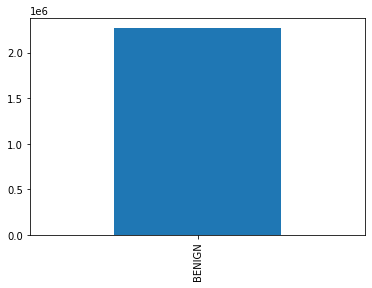

In [37]:
ax = df[' Label'].value_counts().plot(kind='bar')
# for i in range(len(labels)):
#     ax.text(i-0.2,100000, str(lb_count[i]), color='red', fontweight='bold')

In [10]:
print(labels)

['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'Infiltration' 'DDoS' 'Bot' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'PortScan'
 'FTP-Patator' 'SSH-Patator']
